Data with sentiment score:
                                       cleaned_token  sentiment
0  high hopes dress really wanted work . initiall...   0.079459
1  love , love , love jumpsuit . 's fun , flirty ...   0.550000
2  shirt flattering due adjustable front tie . pe...   0.617188
3  love tracy reese dresses , one petite . 5 feet...   0.150000
4  aded basket hte last mintue see would look lik...   0.160500


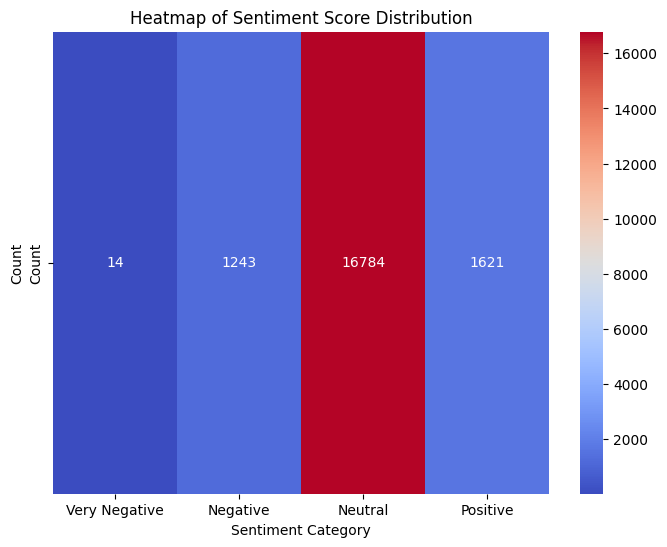

In [16]:

import pandas as pd 
from textblob import TextBlob
import seaborn as sns 
import matplotlib.pyplot as plt 

#Loading the CSV file 
df = pd.read_csv("cleaned_filtered_reviews.csv") 

#A function written to analyze the sentiments and print the score 
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

#Applying the above function to CSV file and printing the score as output 
df['sentiment'] = df['cleaned_token'].apply(sentiment_analysis)
print("Data with sentiment score:")
print(df[['cleaned_token', 'sentiment']].head())
#df.to_csv('sentiment_analysis', columns=['cleaned_token','sentiment'], index=False)

#Graphical representation of the data 
bins = [-1.0, -0.5, 0.0, 0.5, 1.0]  # Define bins
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive']  # Labels for bins

# Categorize sentiment scores
df['sentiment_category'] = pd.cut(df['sentiment'], bins=bins, labels=labels)

# Create a count of each sentiment category
heatmap_data = df['sentiment_category'].value_counts().sort_index()

# Create a DataFrame for heatmap representation
heatmap_df = heatmap_data.values.reshape(1, -1)  # Reshape for heatmap

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt='g', cmap='coolwarm', 
            xticklabels=heatmap_data.index, yticklabels=['Count'])
plt.title('Heatmap of Sentiment Score Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()
